# EMD algorithm - Full analysis for the lateral acceleration

## Maria Inês Silva
## 03/02/2019

***

## Data and library imports

In [1]:
import numpy as np
import pandas as pd
import time
import pickle
import extendedMD.emd as emd
from extendedMD.viz import create_motif_table
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import dtw_clustering as clust
import uah_utils as utils
import clusterviz

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-uah/D6'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))

driver_df = utils.get_full_point_uah_data(data_folder)

## 1. Normal motorway trip

In [3]:
trip_df = driver_df[driver_df['trip_id']=='20151217162714']
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values

R = 0.1
win_size = 10
paa_size = 2
alphabet_size = 5
adaptive_break_points = False

motif_file_name = 'motif_lat_acc_normal_trip.p'
dist_file_name = 'dist_lat_acc_normal_trip.npy'

In [4]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
ExtendedMD algorithm run in 11.37 minutes


In [5]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.08 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cb],1,242,46831.60,0.05
1,"[de, ce, de, ee, ed]",5,3,101892.48,0.06


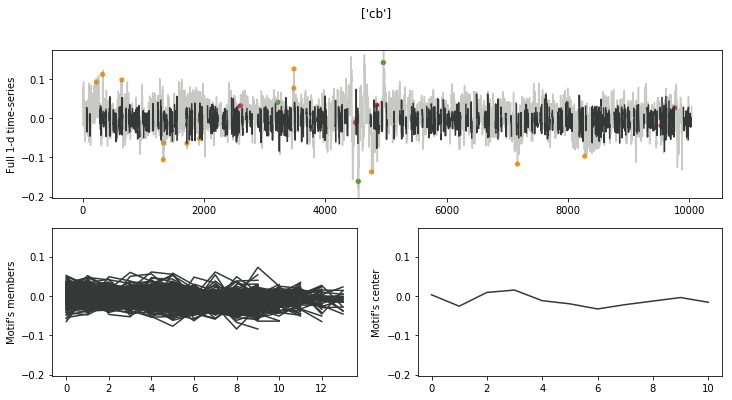

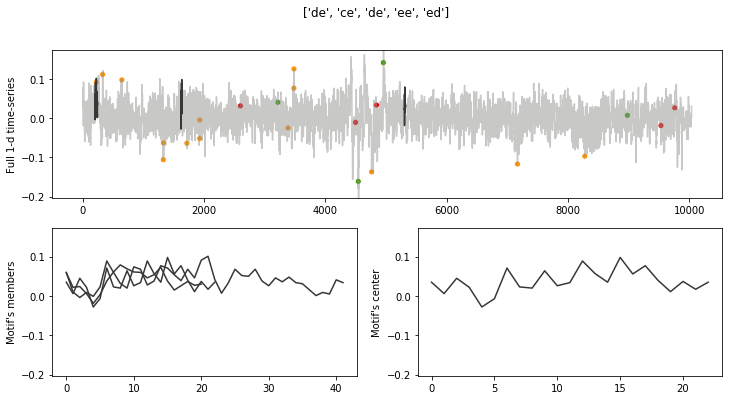

In [6]:
clusterviz.plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list)

In [7]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 53.9 minutes


## 2. Aggressive motorway trip

In [8]:
trip_df = driver_df[driver_df['trip_id']=='20151221120051']
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values

R = 0.1
win_size = 10
paa_size = 2
alphabet_size = 5
adaptive_break_points = False

motif_file_name = 'motif_lat_acc_aggressive_trip.p'
dist_file_name = 'dist_lat_acc_aggressive_trip.npy'

In [9]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
ExtendedMD algorithm run in 8.79 minutes


In [10]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.11 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cc],1,233,37628.27,0.06
1,"[ee, ed]",2,29,60588.81,0.08
2,"[ca, ba, aa, ab, ac, ad]",6,4,79521.46,0.07
3,"[db, ca, ba]",3,4,84043.58,0.05
4,"[ec, eb, ea, da, ca, ba]",6,2,86534.27,0.05
5,"[ae, ce]",2,2,89274.96,0.05
6,"[ac, bb, cb]",3,2,93028.10,0.04


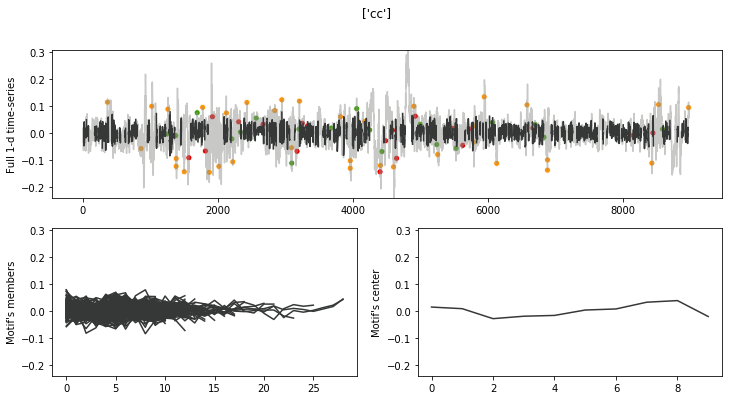

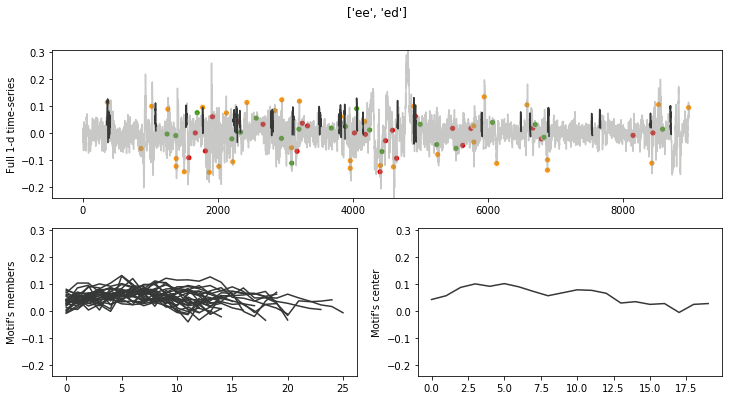

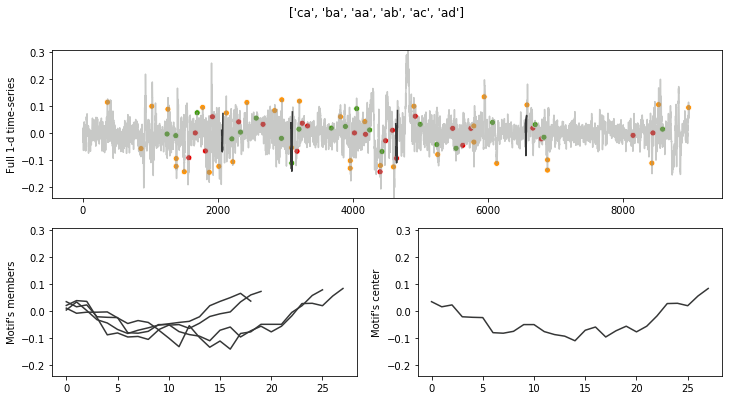

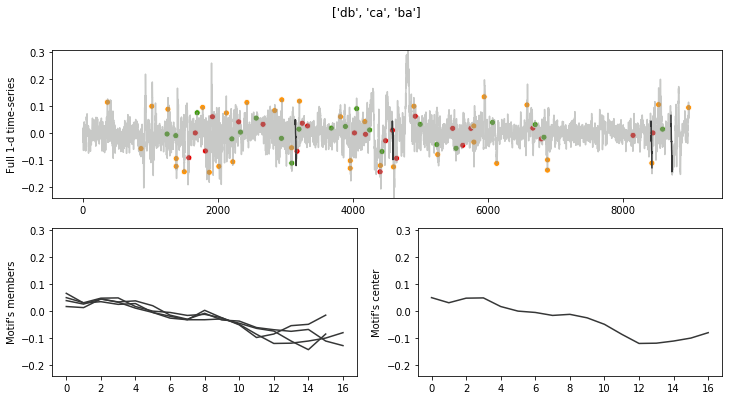

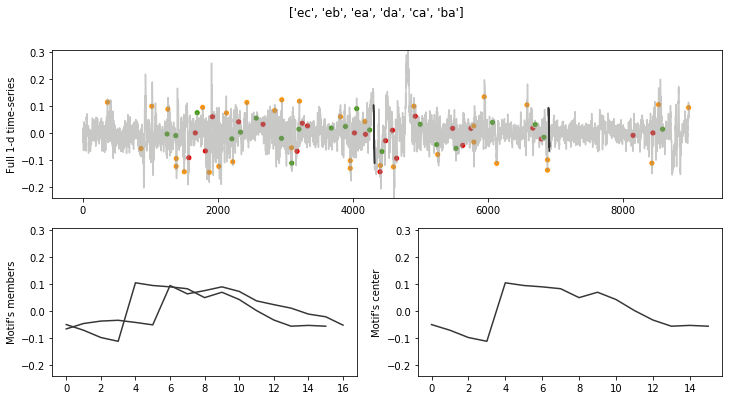

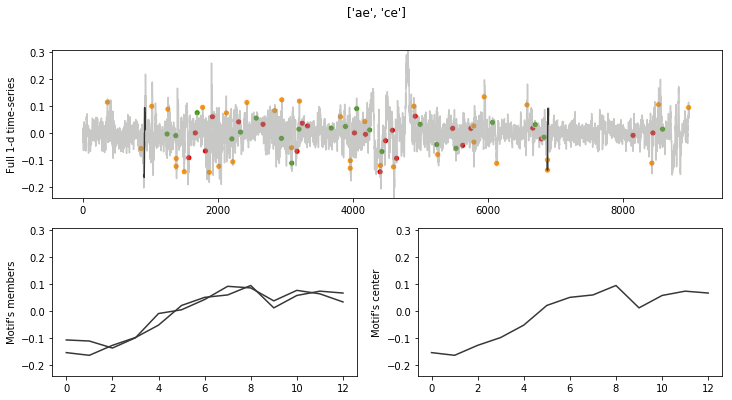

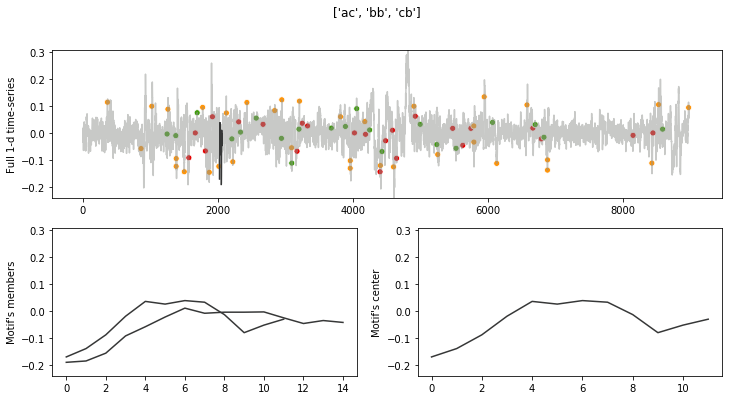

In [11]:
clusterviz.plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list)

In [12]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 25.2 minutes


## 3. Drowsy motorway trip

In [13]:
trip_df = driver_df[driver_df['trip_id']=='20151217164730']
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values

R = 0.1
win_size = 10
paa_size = 2
alphabet_size = 5
adaptive_break_points = False

motif_file_name = 'motif_lat_acc_drowsy_trip.p'
dist_file_name = 'dist_lat_acc_drowsy_trip.npy'

In [14]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

In [15]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.17 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cd],1,228,48818.77,0.06
1,"[ee, ed, ec, eb, da, ca]",6,7,96632.39,0.07
2,"[cb, bc, bb, ba, ca, ba]",6,2,107912.54,0.04
3,"[ca, ba, aa, ab, ac, ad, ae, be, ce, de, ee]",11,2,112151.30,0.05
4,"[ed, dd, dc, dd, ce]",5,2,115667.21,0.05


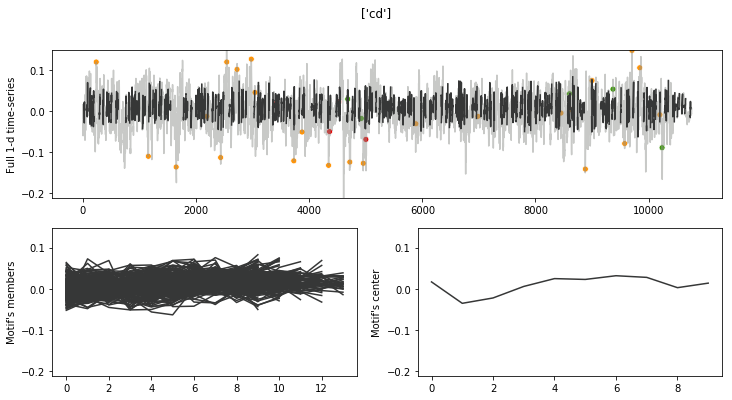

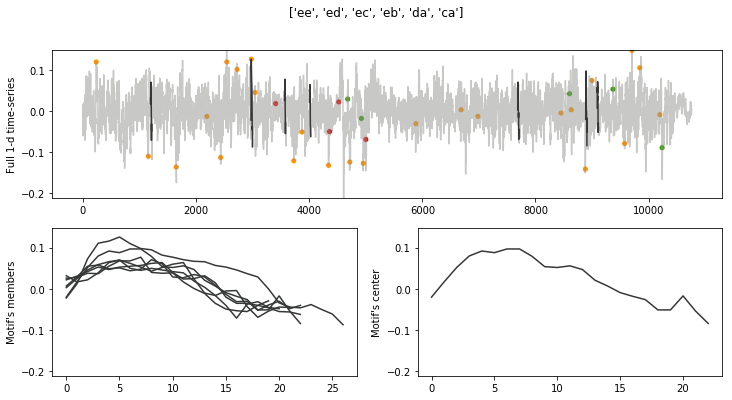

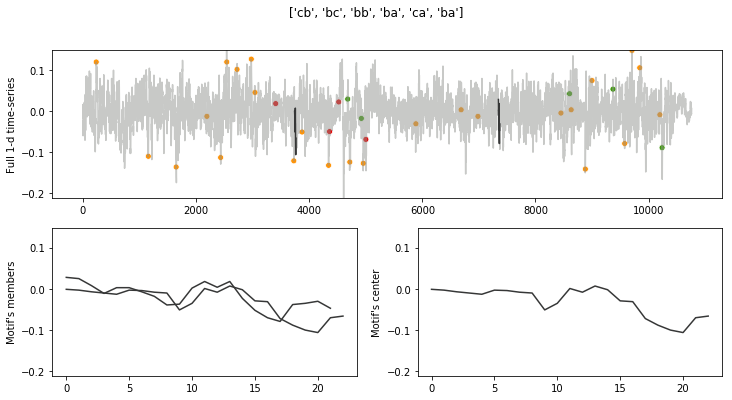

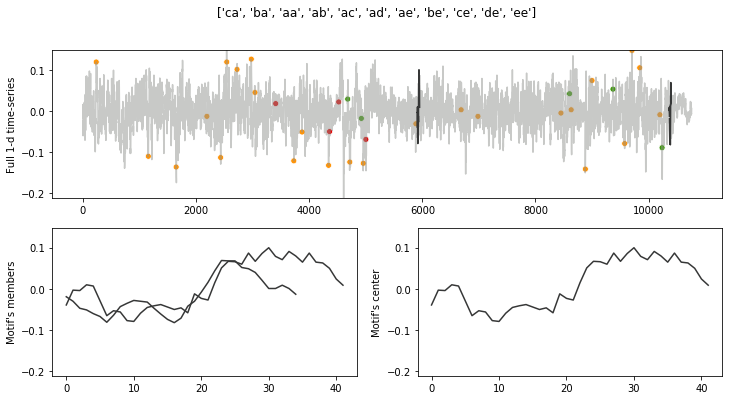

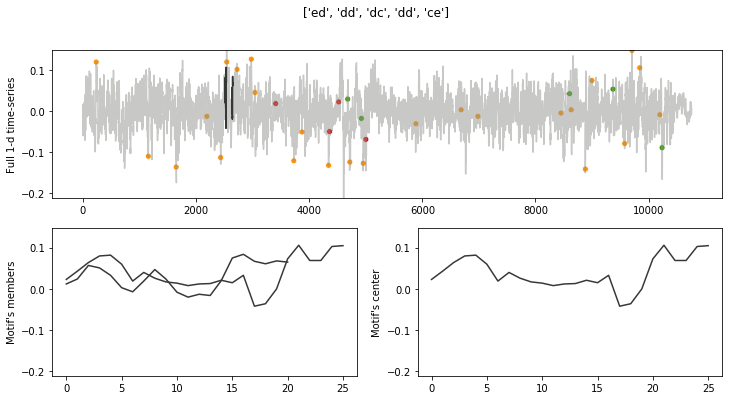

In [16]:
clusterviz.plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list)

In [17]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 66.4 minutes


## 4. Normal Secondary trip

In [18]:
trip_df = driver_df[driver_df['trip_id']=='20151221112434']
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values

R = 0.1
win_size = 10
paa_size = 2
alphabet_size = 5
adaptive_break_points = False

motif_file_name = 'motif_lat_acc_secondary_trip.p'
dist_file_name = 'dist_lat_acc_secondary_trip.npy'

In [19]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
ExtendedMD algorithm run in 7.61 minutes


In [20]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.03 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cc],1,197,34768.75,0.05


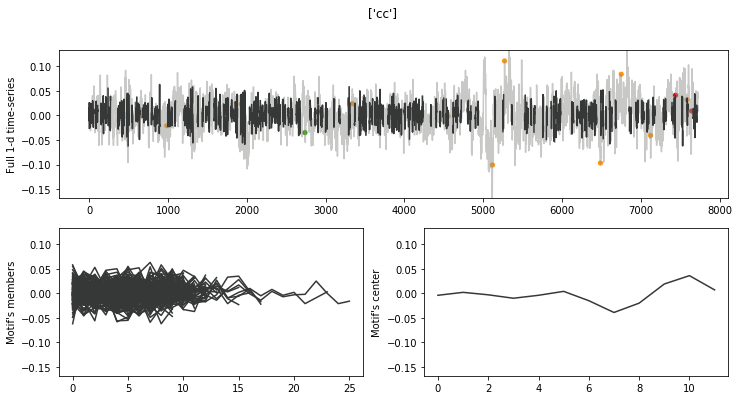

In [21]:
clusterviz.plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list)

In [22]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 28.9 minutes
